In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2FwdXJ2YW5ha2FkZS9HaXRodWIvTW9udGUtQ2FybG8tTWV0aG9kcy9jaGFwdGVycy9lc3RpbWF0aW9u'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/apurvanakade/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1708117302.8894389, "/Users/apurvanakade/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1708117302.895673, "/Users/apurvanakade/miniconda3/lib/python3.12/zipimport.py": 1708117300.842618, "/Users/apurvanakade/miniconda3/lib/python3.12/codecs.py": 1708117300.2231953, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/aliases.py": 1708117301.4904184, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/__init__.py": 1708117301.4862745, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/utf_8.py": 1708117302.0979323, "/Users/apurvanakade/miniconda3/lib/python3.12/abc.py": 1708117300.1248448, "/Users/apurvanakade/miniconda3/lib/python3.12/io.py": 1708117300.4300423, "/Users/apurvanakade/miniconda3/lib/python3.12/stat.py": 1708117300.6806324, "/Users/apurvanakade/miniconda3/lib/python3.12/_collections_abc.py": 1708117300.0486746, "/Users/apurvanakade/miniconda3/lib/python3.12/genericpath.

/var/folders/2y/zsgtjj415jdb0d4y2b_wx7th0000gn/T/ipykernel_75821/2528839951.py:25: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



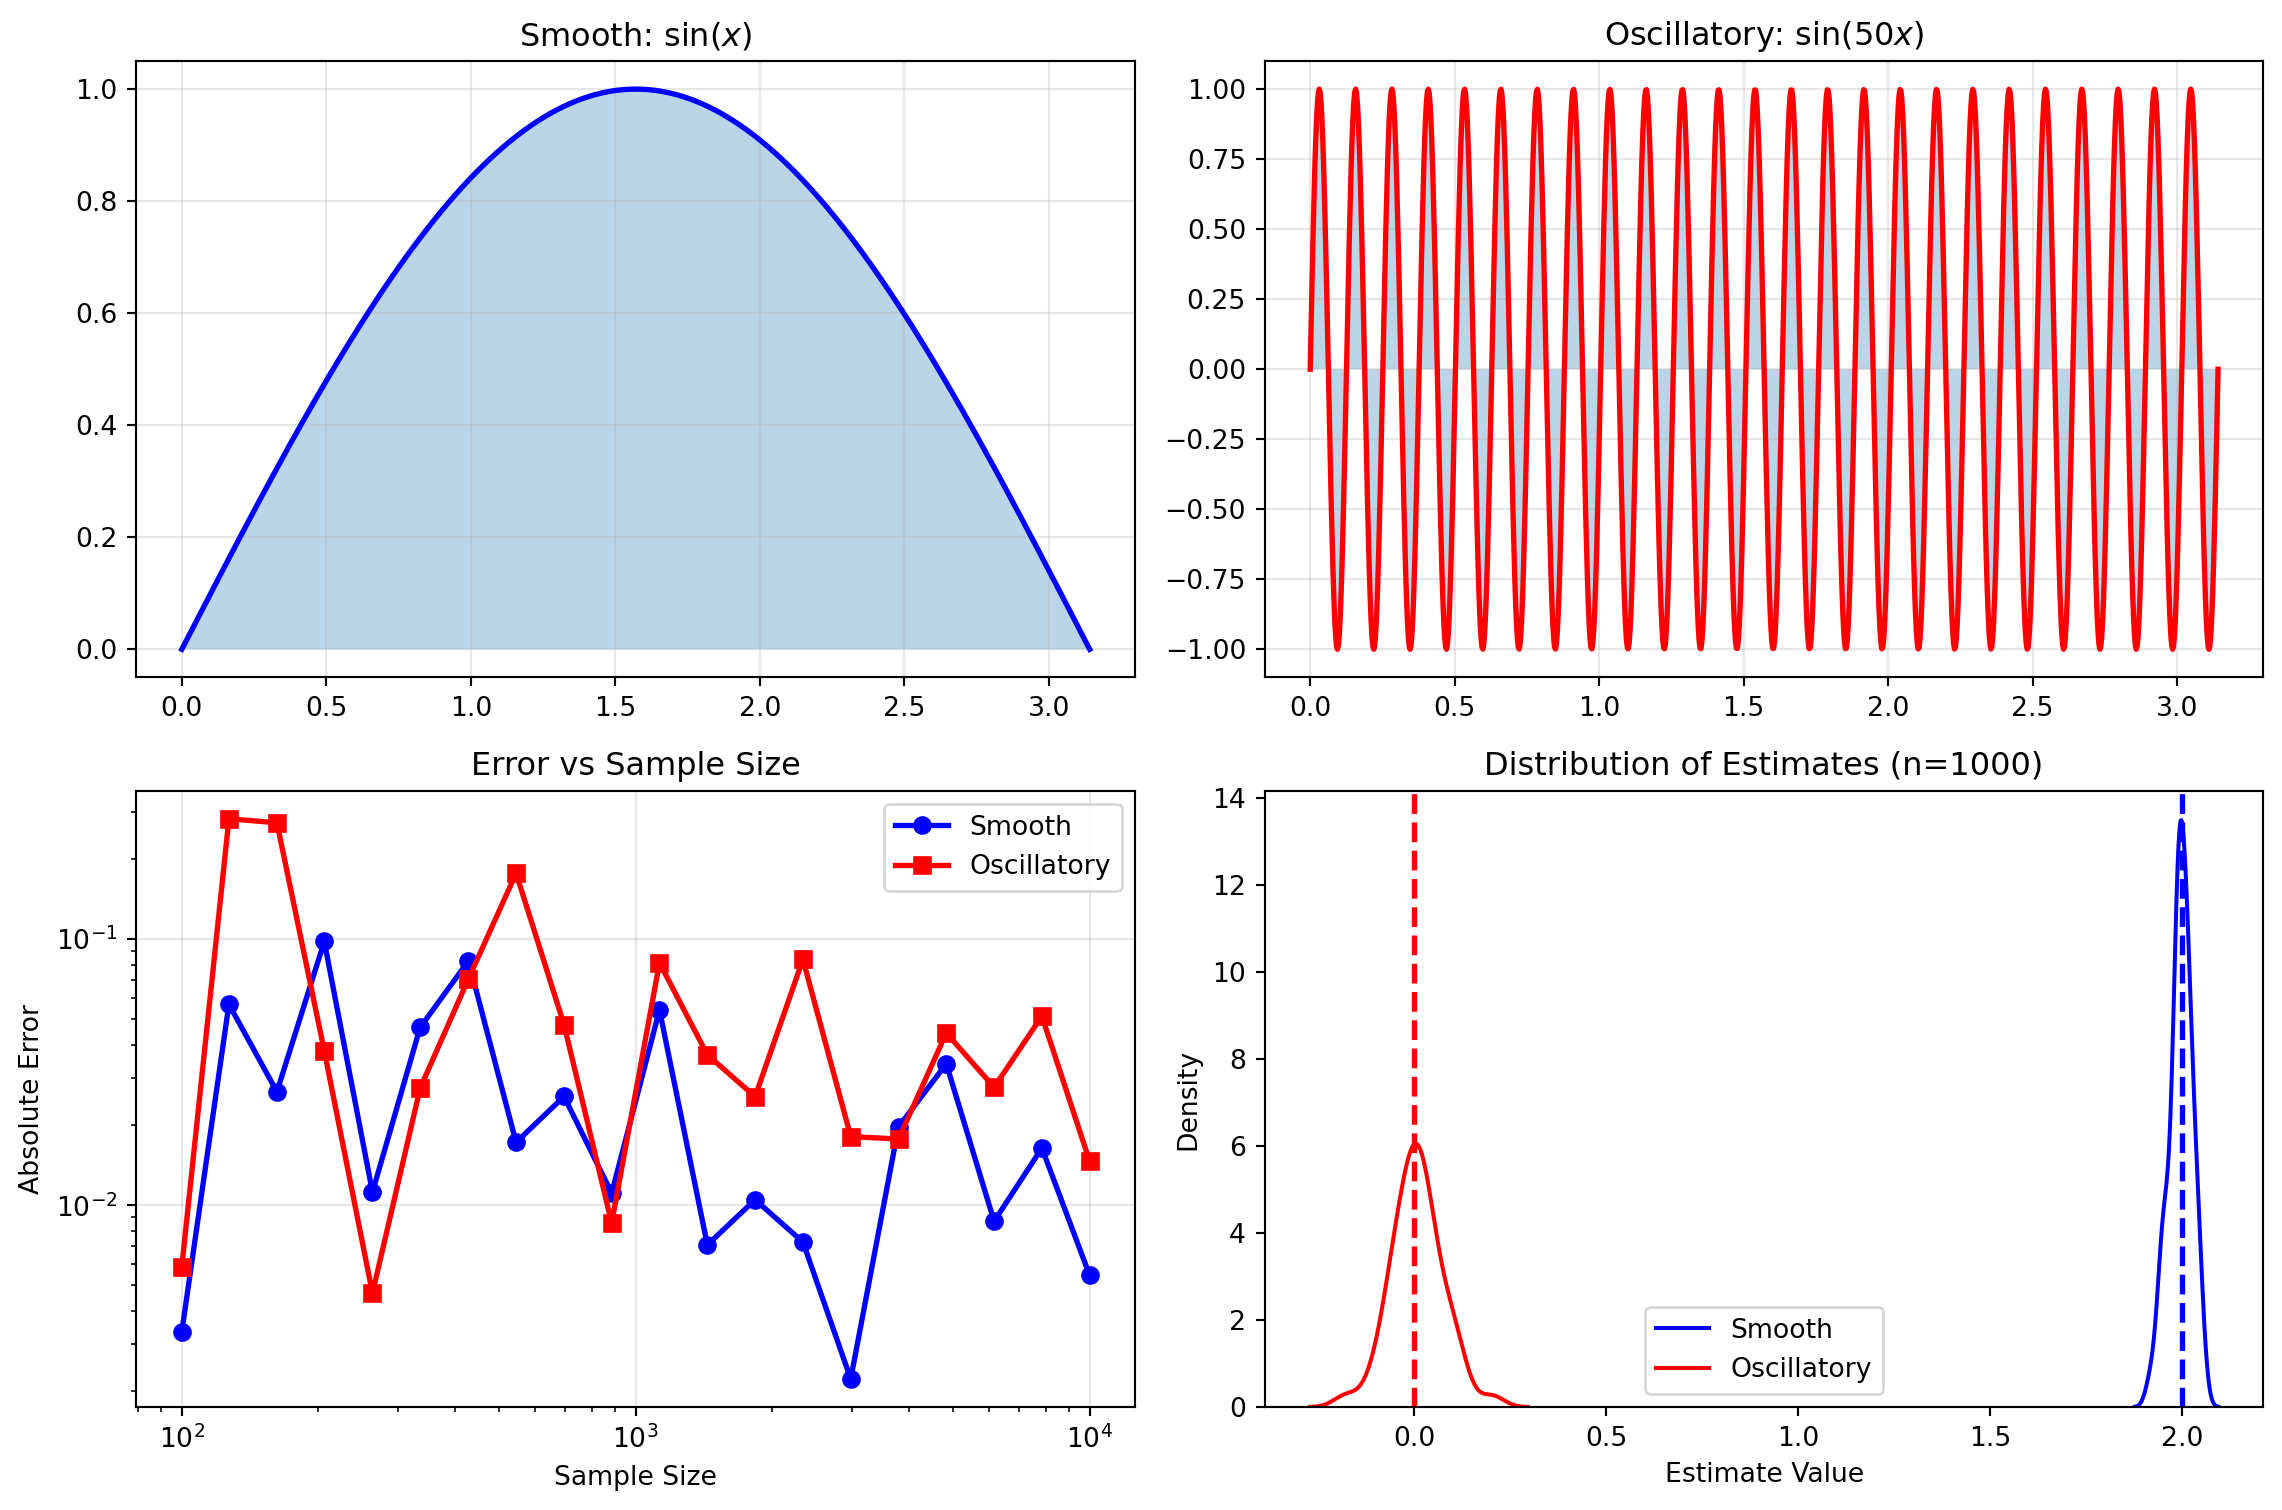

Monte Carlo Results (1000 samples, 50 runs each):
Function     True Value   Mean Est     Std Dev      Error       
-----------------------------------------------------------------
Smooth       2.000000     1.995125     0.029182     0.004875    
Oscillatory  0.000000     0.008163     0.066666     0.008163    

Variance ratio (Osc/Smooth): 2.3x higher


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import pandas as pd

np.random.seed(0)

def monte_carlo_integrate(func, a, b, n_samples):
    x_samples = np.random.uniform(a, b, n_samples)
    return (b - a) * np.mean(func(x_samples))

# Two contrasting functions
def smooth(x):
    return np.sin(x)  # Smooth oscillation

def oscillatory(x):
    return np.sin(50*x)  # Rapid oscillations

# True values
a, b = 0, np.pi
true_smooth, _ = integrate.quad(smooth, a, b)
true_osc, _ = integrate.quad(oscillatory, a, b)

# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

x = np.linspace(a, b, 1000)

# Functions
ax1.plot(x, smooth(x), 'b-', linewidth=2)
ax1.fill_between(x, 0, smooth(x), alpha=0.3)
ax1.set_title(r'Smooth: $\sin(x)$')
ax1.grid(True, alpha=0.3)

ax2.plot(x, oscillatory(x), 'r-', linewidth=2)
ax2.fill_between(x, 0, oscillatory(x), alpha=0.3)
ax2.set_title(r'Oscillatory: $\sin(50x)$')
ax2.grid(True, alpha=0.3)

# Convergence
samples = np.logspace(2, 4, 20).astype(int)
errors_smooth = [abs(monte_carlo_integrate(smooth, a, b, n) - true_smooth) for n in samples]
errors_osc = [abs(monte_carlo_integrate(oscillatory, a, b, n) - true_osc) for n in samples]

ax3.loglog(samples, errors_smooth, 'b-o', label='Smooth', linewidth=2)
ax3.loglog(samples, errors_osc, 'r-s', label='Oscillatory', linewidth=2)
ax3.set_xlabel('Sample Size')
ax3.set_ylabel('Absolute Error')
ax3.set_title('Error vs Sample Size')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Multiple estimates at fixed sample size
n_test = 1000
estimates_smooth = [monte_carlo_integrate(smooth, a, b, n_test) for _ in range(50)]
estimates_osc = [monte_carlo_integrate(oscillatory, a, b, n_test) for _ in range(50)]

import seaborn as sns

sns.kdeplot(estimates_smooth, ax=ax4, color='blue', label='Smooth')
sns.kdeplot(estimates_osc, ax=ax4, color='red', label='Oscillatory')
ax4.axvline(true_smooth, color='blue', linestyle='--', linewidth=2)
ax4.axvline(true_osc, color='red', linestyle='--', linewidth=2)
ax4.set_xlabel('Estimate Value')
ax4.set_title(f'Distribution of Estimates (n={n_test})')
ax4.legend()

plt.tight_layout()
plt.show()

# Numerical comparison
print("Monte Carlo Results (1000 samples, 50 runs each):")
print(f"{'Function':<12} {'True Value':<12} {'Mean Est':<12} {'Std Dev':<12} {'Error':<12}")
print("-" * 65)
print(f"{'Smooth':<12} {true_smooth:<12.6f} {np.mean(estimates_smooth):<12.6f} {np.std(estimates_smooth):<12.6f} {abs(np.mean(estimates_smooth) - true_smooth):<12.6f}")
print(f"{'Oscillatory':<12} {true_osc:<12.6f} {np.mean(estimates_osc):<12.6f} {np.std(estimates_osc):<12.6f} {abs(np.mean(estimates_osc) - true_osc):<12.6f}")
print(f"\nVariance ratio (Osc/Smooth): {np.std(estimates_osc)/np.std(estimates_smooth):.1f}x higher")

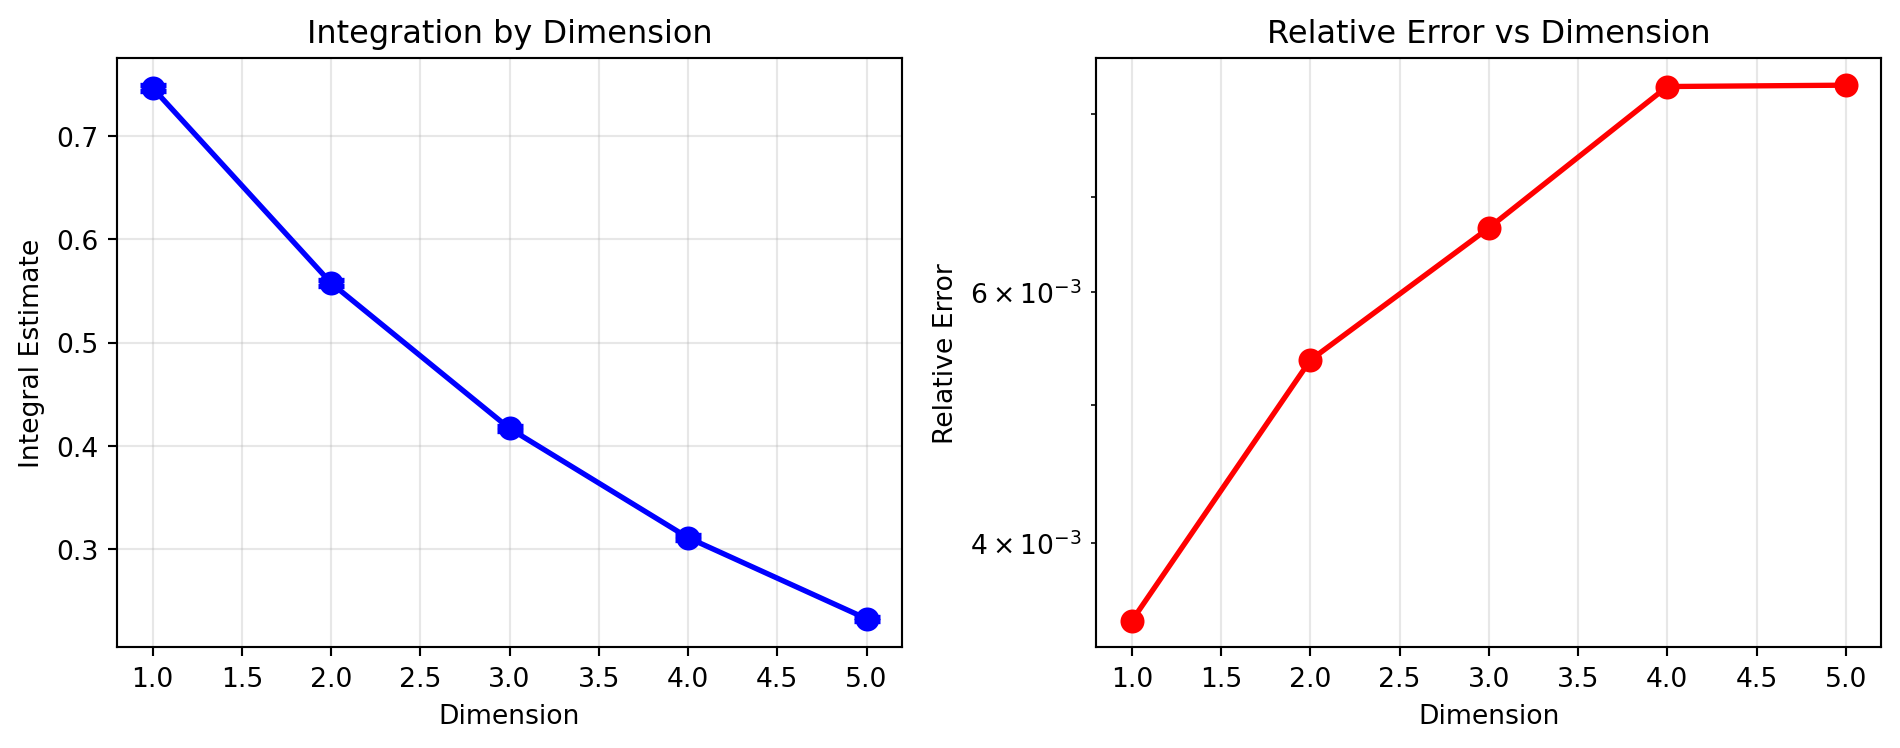


Multidimensional Integration Results From 5000 samples:
 Dimension  Estimate  Std Error  Rel Error
         1  0.746862   0.002633   0.003526
         2  0.557696   0.002997   0.005374
         3  0.416759   0.002773   0.006654
         4  0.310918   0.002601   0.008364
         5  0.232390   0.001948   0.008383


In [3]:
#| label: fig-multidimensional
#| fig-cap: Monte Carlo advantage in higher dimensions

def multidimensional_example():
    """Demonstrate MC integration in higher dimensions"""
    
    # Function: exp(-||x||²) over unit hypercube
    def f_nd(points):
        return np.exp(-np.sum(points**2, axis=1))
    
    dimensions = [1, 2, 3, 4, 5]
    n_samples = 5000
    
    results = []
    
    for dim in dimensions:
        estimates = []
        for _ in range(100):  # Multiple runs
            # Sample points in [0,1]^d
            points = np.random.uniform(0, 1, (n_samples, dim))
            f_values = f_nd(points)
            estimate = np.mean(f_values)  # Volume of unit cube is 1
            estimates.append(estimate)
        
        mean_est = np.mean(estimates)
        std_est = np.std(estimates)
        
        results.append({
            'Dimension': dim,
            'Estimate': mean_est,
            'Std Error': std_est,
            'Rel Error': std_est/mean_est if mean_est > 0 else np.inf
        })
    
    df = pd.DataFrame(results)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # Estimates by dimension with error bars
    ax1.errorbar(df['Dimension'], df['Estimate'], 
                yerr=df['Std Error'], 
                fmt='bo-', linewidth=2, markersize=8, capsize=5, capthick=2)
    ax1.set_xlabel('Dimension')
    ax1.set_ylabel('Integral Estimate')
    ax1.set_title('Integration by Dimension')
    ax1.grid(True, alpha=0.3)
    
    # Relative error with error bars showing uncertainty in the error estimate
    ax2.semilogy(df['Dimension'], df['Rel Error'], 'ro-', linewidth=2, markersize=8)
    ax2.set_xlabel('Dimension')
    ax2.set_ylabel('Relative Error')
    ax2.set_title('Relative Error vs Dimension')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\nMultidimensional Integration Results From 5000 samples:")
    print(df.to_string(index=False, float_format='%.6f'))
    
    # # Show the actual estimates from one run to see the variation
    # print(f"\nSample of estimates for dimension 3 (first 10 runs):")
    # points_3d = [np.random.uniform(0, 1, (n_samples, 3)) for _ in range(10)]
    # estimates_3d = [np.mean(f_nd(points)) for points in points_3d]
    # for i, est in enumerate(estimates_3d):
    #     print(f"Run {i+1}: {est:.6f}")
    # print(f"Standard deviation: {np.std(estimates_3d):.6f}")

multidimensional_example()